In [311]:
# Import work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight


red_wine = pd.read_csv('winequality-red.csv',  delimiter= ';')
white_wine = pd.read_csv('winequality-white.csv', delimiter= ';')


In [312]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 0
if value <= 5 else 1)

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 0
if value <= 5 else 1)

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
# red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
# categories=['Low', 'Medium'])

# white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
# categories=['Low', 'Medium'])


In [313]:
rw = pd.DataFrame(red_wine)
ww = pd.DataFrame(white_wine)

In [314]:
ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [315]:
all_wine = pd.concat([white_wine, red_wine], ignore_index=True)
all_wine.shape[0]

6497

In [316]:
#finding empty values in the columns
rw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

In [317]:
#finding the duplicates
rw.duplicated().sum()

240

In [318]:
#removing all duplicates
#rw.drop_duplicates(inplace=True)

In [319]:
q1 = rw.quantile(0.25)
q3 = rw.quantile(0.75)
iqr = q3 - q1
rw = rw[~((rw < (q1 - 1.5 * iqr)) | (rw > (q3 + 1.5 * iqr))).any(axis=1)]

In [320]:
X = rw.drop(columns=['quality_label', 'quality'])
y = rw['quality_label']

display(X.shape)
display(y.shape)

(1179, 11)

(1179,)

In [321]:
print("number of high quality wines:",(rw['quality_label'] == 1).sum())
print("number of low quality wines:", (rw['quality_label'] == 0).sum())

number of high quality wines: 633
number of low quality wines: 546


In [322]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [323]:
print("values for y:", y_train.shape, y_test.shape)
print("values for X:", X_train.shape, X_test.shape)

values for y: (943,) (236,)
values for X: (943, 11) (236, 11)


In [324]:
#Scaler
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [325]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train_norm, y_train)

y_pred = lreg.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')

Accuracy: 73%


In [326]:
# Making the KNN model
model = KNeighborsClassifier()
model.fit(X_train_norm, y_train)

#testing the accuracy of the model
y_pred = model.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')

Accuracy: 76%


c:\Users\renev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [327]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_norm, y_train)

y_pred = dtc.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')

Accuracy: 71%


In [328]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_norm, y_train)

y_pred = rfc.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("Low", "Medium"), columns=("Low", "Medium"))
display(a)

Accuracy: 83%
Confusion matrix:


,Low,Medium
Low,90,15
Medium,26,105


In [329]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_norm, y_train)

y_pred = svc.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("Low", "Medium"), columns=("Low", "Medium"))
display(a)

Accuracy: 77%
Confusion matrix:


,Low,Medium
Low,87,18
Medium,36,95


In [330]:
# # New wine sample test:
# new_wine = [7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4,	6] #Red 1

# # Use the trained model to predict the quality of the new wine sample
# quality_label_type = lreg.predict([new_wine])

# if quality_label_type == 0:
#     print(f"This Red wine has a low quality.")
# else:
#     print(f"This Red wine has a medium quality.")

In [331]:
rw['quality_label_type'] = svc.predict(X)
result = rw[(rw['quality_label'] != rw['quality_label_type']) 
                  & (rw['quality_label'] == 0)]

result.shape

c:\Users\renev\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(0, 14)

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear', class_weight={0: 1.08, 1: 0.93}))
model_pipeline.append(RandomForestClassifier(class_weight={0: 1.08, 1: 0.93}))
model_pipeline.append(SVC(class_weight={0: 1.08, 1: 0.93}))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(GaussianNB())


In [398]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['LogisticRegression', 'Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []
ck_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(round(metrics.accuracy_score(y_test, y_pred),2))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))
    ck_list.append(y_pred)

c:\Users\renev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


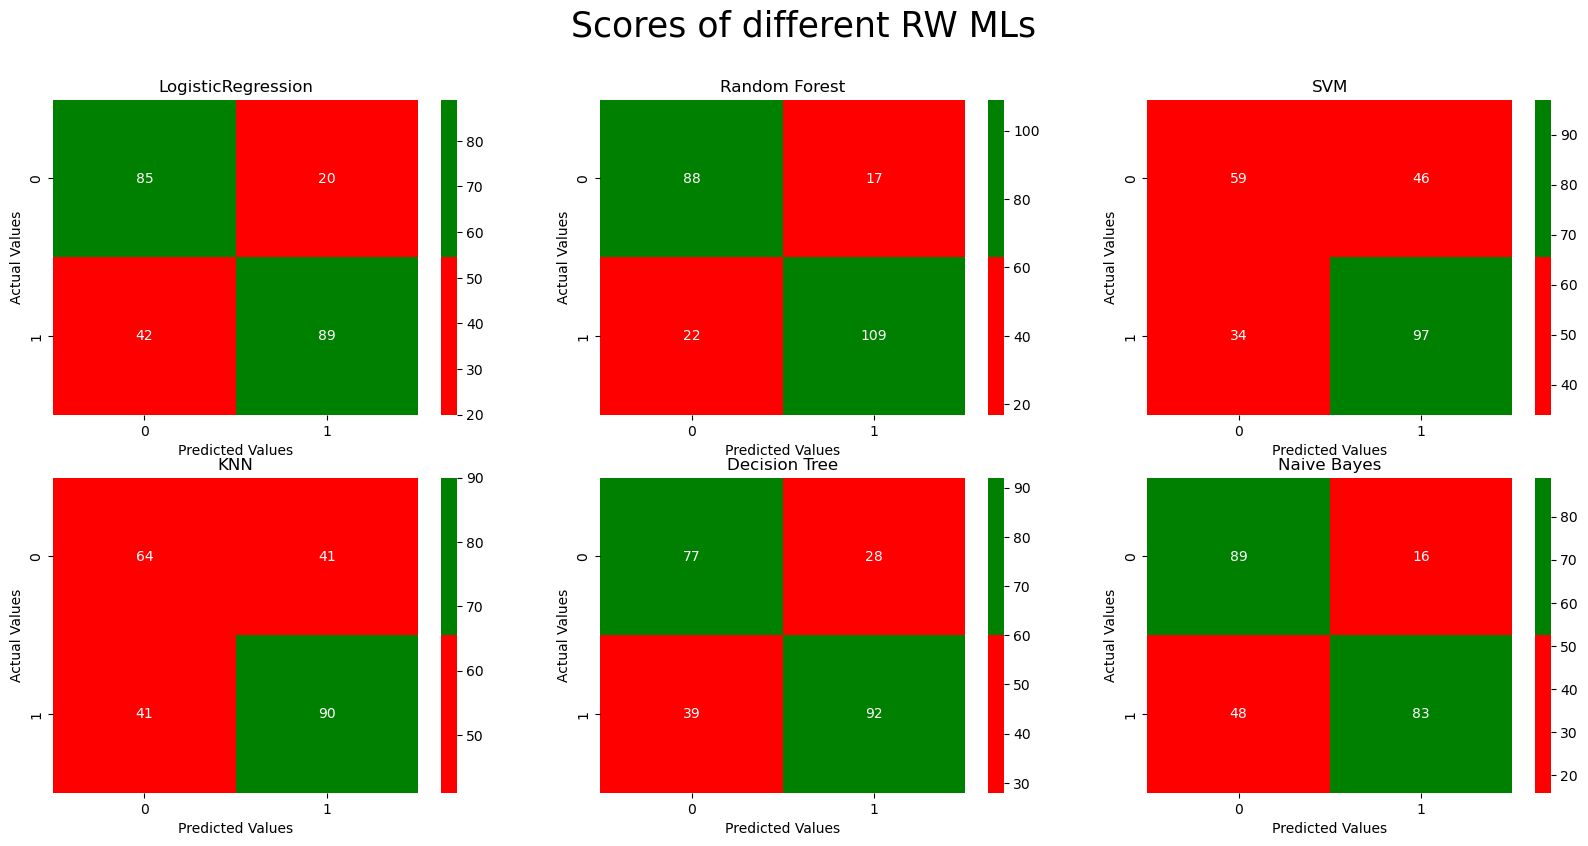

In [399]:
## plot confusion matrix
from matplotlib import colors

# Define the colors for each category
low_color = 'red'   # light salmon
med_color =  'green'  # sky blue
colors_list = [low_color, med_color]

fig = plt.figure(figsize=(20,9))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = colors_list, fmt= '.0f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
plt.suptitle('Scores of different RW MLs', fontsize= 25)

plt.show()

In [400]:
### accuracy and AUC
results_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
display(results_df)

,Model,Accuracy,AUC
0,LogisticRegression,0.74,0.74
1,Random Forest,0.83,0.84
2,SVM,0.66,0.65
3,KNN,0.65,0.65
4,Decision Tree,0.72,0.72
5,Naive Bayes,0.73,0.74


In [401]:
for i in range(len(ck_list)):
    ck = ck_list[i]
    print(model_list[i])
    print(classification_report(y_test, ck))

LogisticRegression
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       105
           1       0.82      0.68      0.74       131

    accuracy                           0.74       236
   macro avg       0.74      0.74      0.74       236
weighted avg       0.75      0.74      0.74       236

Random Forest
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.87      0.83      0.85       131

    accuracy                           0.83       236
   macro avg       0.83      0.84      0.83       236
weighted avg       0.84      0.83      0.84       236

SVM
              precision    recall  f1-score   support

           0       0.63      0.56      0.60       105
           1       0.68      0.74      0.71       131

    accuracy                           0.66       236
   macro avg       0.66      0.65      0.65       236
weighted avg       0.66      0.66    

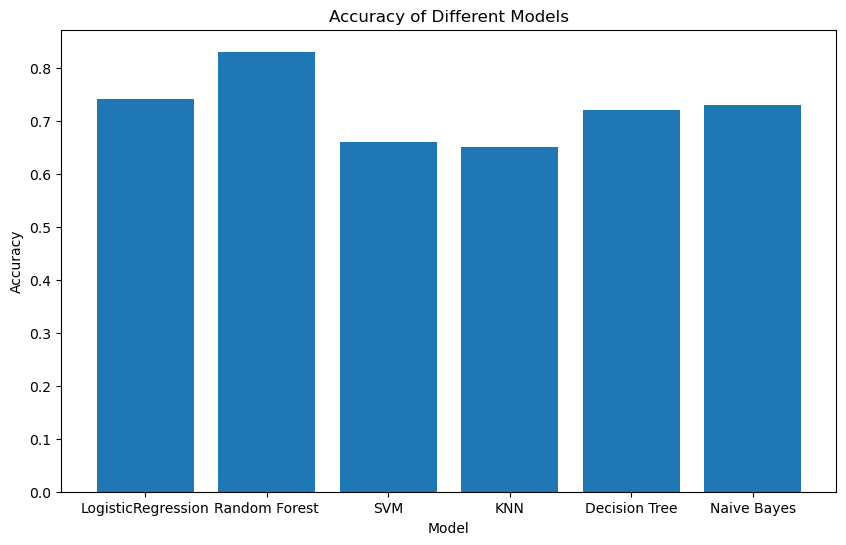

In [402]:
# Create a bar chart showing the accuracy of each model
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(results_df['Model'], results_df['Accuracy'])


# Set the title and axis labels
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

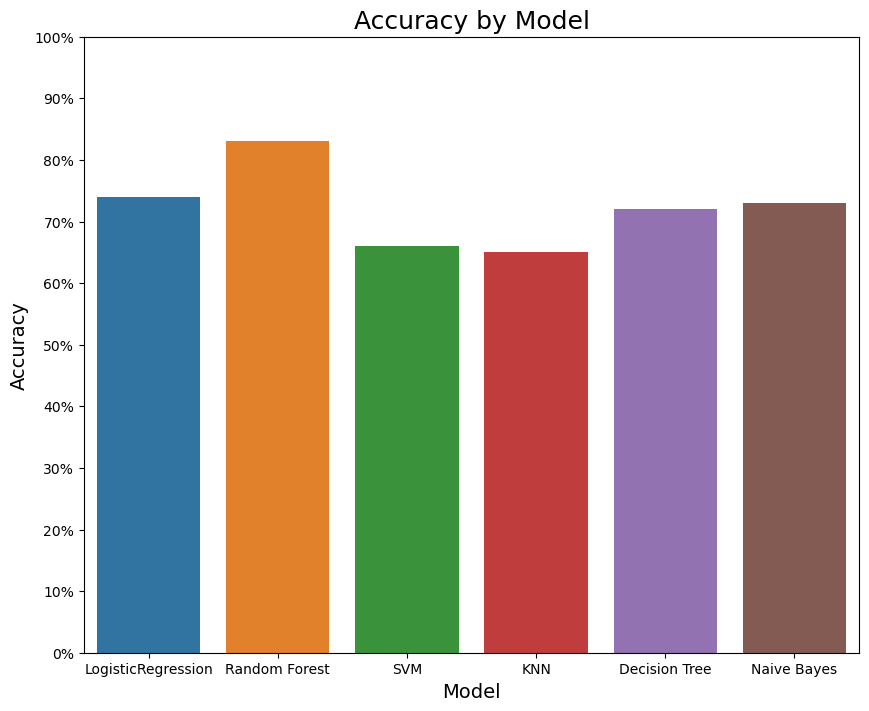

In [403]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=ax)
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax.set_title('Accuracy by Model', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
plt.show()

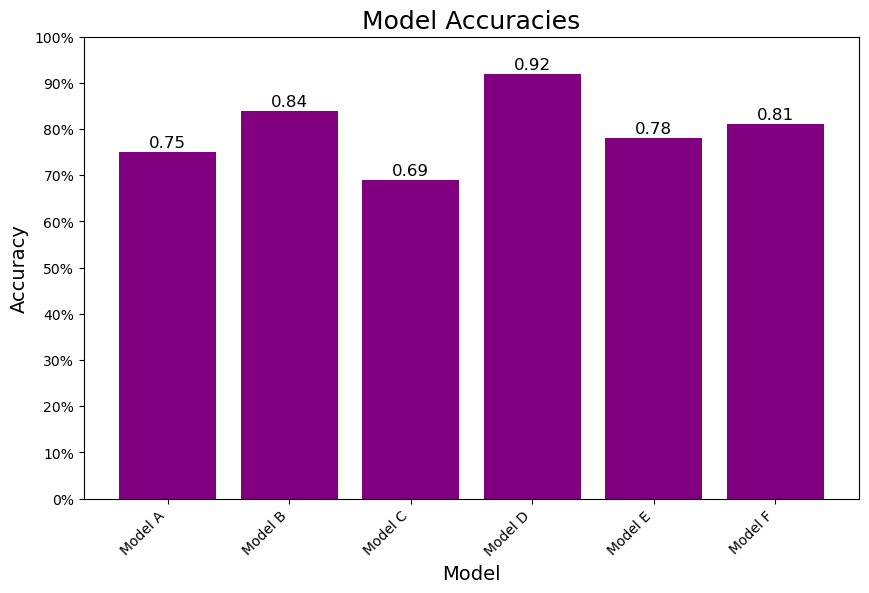

In [404]:
model_list = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F']
acc_list = [0.75, 0.84, 0.69, 0.92, 0.78, 0.81]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(model_list, acc_list, color='purple')
ax.set_title('Model Accuracies', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim([0, 1])
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_major_formatter('{x:.0%}')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(acc_list):
    ax.text(i, v+0.01, str(round(v, 2)), ha='center', fontsize=12)
